# **Insper - Eletromagnetismo e Ondulatória** #


**Projeto**



In [41]:
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Definindo valores dos capacitores e frequências analisados
Cs = [150*1e-9, 0.1*1e-6, 0.47*1e-6, 1e-6, 4.7*1e-6]
Cs_labels = ['150nF', '0.1uF', '0.47uF', '1uF', '4.7uF']
fs = np.arange(1, 100*1e3, 10)

# Definindo valores dos componentes
Rc = 20
k = 0.2
V1 = 3

c) Observe a função que criamos na célula abaixo. Tente explicar o que ela faz.

In [43]:
# Transoformador em série
def CalcularTransformadorSerie(Uf, c, f):
    # Capacitores 1 e 2
    C1 = c
    C2 = c
    
    # Indutâncias 1 e 2
    w = 2*np.pi*f
    L1 = 1/(w**2*C1)
    L2 = 1/(w**2*C2)

    # Resistência mínima das bobinas
    R1 = 0.2
    R2 = 0.2
    
    # Efeito pelicular das bobinas
    R1 = R1 + (R1*f)/(1e5)
    R2 = R2 + (R2*f)/(1e5)

    # Indutância mútua
    M = k * sqrt(L1 * L2)
    
    # Impedâncias
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1/(w * C1))
    XC2 = complex(0, -1/(w * C2))
    XM = complex(0, w * M)
    
    # Matriz de impedâncias
    Z=np.array([
        [R1 + XL1 + XC1, -XM], 
        [-XM, XL2 + R2 + XC2 + Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    # Retorna I1 e I2
    return i[0], i[1], L1

def CalcularTransformadorParalelo(Uf, c, f):
    # Capacitores 1 e 2
    C1 = c
    C2 = c
    
    # Indutâncias 1 e 2
    w = 2*np.pi*f
    L1 = 1/(w**2*C1)
    L2 = 1/(w**2*C2)
    
    # Resistência mínima das bobinas
    R1 = 0.2
    R2 = 0.2
    
    # Efeito pelicular das bobinas
    R1 = R1 + (R1*f)/(1e5)
    R2 = R2 + (R2*f)/(1e5)

    # Indutância mútua
    M = k * sqrt(L1 * L2)
    
    # Impedâncias
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1/(w * C1))
    XC2 = complex(0, -1/(w * C2))
    XM = complex(0, w * M)
    
    # Impedância equivalente do capacitor 2 e resistor em paralelo
    Zeq_C2_RC = (Rc*XC2)/(Rc+XC2)
    
    # Matriz de impedâncias
    Z=np.array([
        [R1 + XL1 + XC1, -XM], 
        [-XM, R2 + XL2 + Zeq_C2_RC]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    # Corrente no resistor de carga
    i_rc = (XC2*i[1])/(Rc+XC2)
    
    # Retorna I1, I2, Zeq_C2_RC, I_RC
    return i[0], i[1], Zeq_C2_RC, i_rc

In [44]:
resultados_serie = {}
resultados_paralelo = {}

# Calculando os resultados de V2 e eficiência para cada configuração de 
for c in Cs:
    V2s_serie = []
    ns_serie = []
    
    V2s_paralelo = []
    ns_paralelo = []
    
    # Calculando para cada frequência
    for f in fs:
        # Calculando para transformador em série
        i1, i2, L1 = CalcularTransformadorSerie(V1, c, f)
        
        # Calculando V2 e eficiência
        V2 = i2*Rc
        s1 = V1*i1.conjugate()/2
        s2 = V2*i2.conjugate()/2
        n = np.real(s2)/np.real(s1)
        
        V2s_serie.append(abs(V2))
        ns_serie.append(n*100)
        resultados_serie[c] = {"V2": V2s_serie, "n": ns_serie}
        
        # Calculando para transformador em paralelo
        i1, i2, Zeq_C2_RC, i_rc = CalcularTransformadorParalelo(V1, c, f)
        
        # Calculando V2 e eficiência
        V2 = i2*Zeq_C2_RC
        s1 = V1*i1.conjugate()/2
        s2 = V2*i_rc.conjugate()/2
        n = np.real(s2)/np.real(s1)
        
        V2s_paralelo.append(abs(V2))
        ns_paralelo.append(n*100)
        resultados_paralelo[c] = {"V2": V2s_paralelo, "n": ns_paralelo}

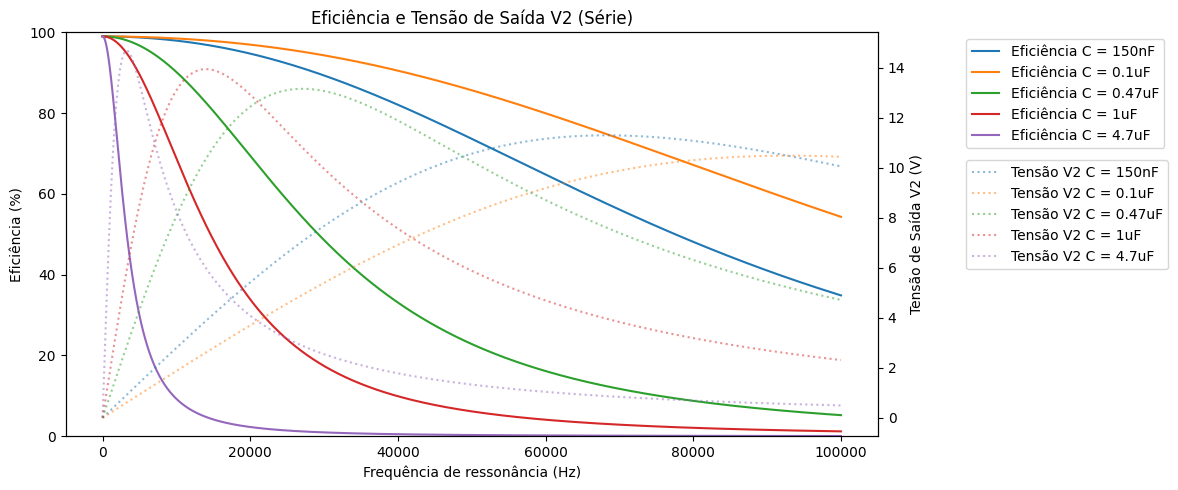

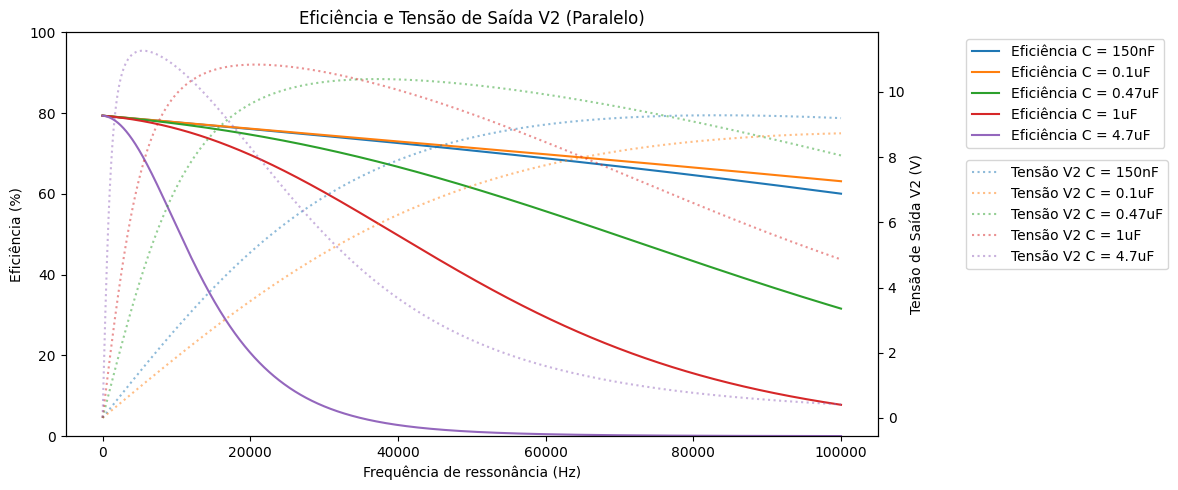

In [45]:
# Figura 1: Eficiência e Tensão de Saída (Série)
fig2, ax2 = plt.subplots(figsize=(12, 5))

# Eixo da esquerda (Eficiência)
for i, c in enumerate(Cs):
    ax2.plot(fs, resultados_serie[c]['n'], linestyle='-', label=f'Eficiência C = {Cs_labels[i]}')
ax2.set_xlabel('Frequência de ressonância (Hz)')
ax2.set_ylabel('Eficiência (%)')
ax2.set_title('Eficiência e Tensão de Saída V2 (Série)')
ax2.set_ylim(0, 100)

# Criando o segundo eixo y para a tensão de saída
ax2_2 = ax2.twinx()
for i, c in enumerate(Cs):
    ax2_2.plot(fs, resultados_serie[c]['V2'], alpha=0.5, linestyle='dotted', label=f'Tensão V2 C = {Cs_labels[i]}')
ax2_2.set_ylabel('Tensão de Saída V2 (V)')

# Movendo as legendas para a direita do gráfico
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
ax2_2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.7))

# Ajustando o layout da segunda figura
fig2.tight_layout()
plt.show()



# Figura 2: Eficiência e Tensão de Saída (Paralelo)
fig1, ax1 = plt.subplots(figsize=(12, 5))

# Eixo da esquerda (Eficiência)
for i, c in enumerate(Cs):
    ax1.plot(fs, resultados_paralelo[c]['n'], linestyle='-', label=f'Eficiência C = {Cs_labels[i]}')
ax1.set_xlabel('Frequência de ressonância (Hz)')
ax1.set_ylabel('Eficiência (%)')
ax1.set_title('Eficiência e Tensão de Saída V2 (Paralelo)')
ax1.set_ylim(0, 100)

# Criando o segundo eixo y para a tensão de saída
ax1_2 = ax1.twinx()
for i, c in enumerate(Cs):
    ax1_2.plot(fs, resultados_paralelo[c]['V2'], alpha=0.5, linestyle='dotted', label=f'Tensão V2 C = {Cs_labels[i]}')
ax1_2.set_ylabel('Tensão de Saída V2 (V)')

# Movendo as legendas p  ara a direita do gráfico
ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
ax1_2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.7))

# Ajustando o layout da primeira figura
fig1.tight_layout()
plt.show()